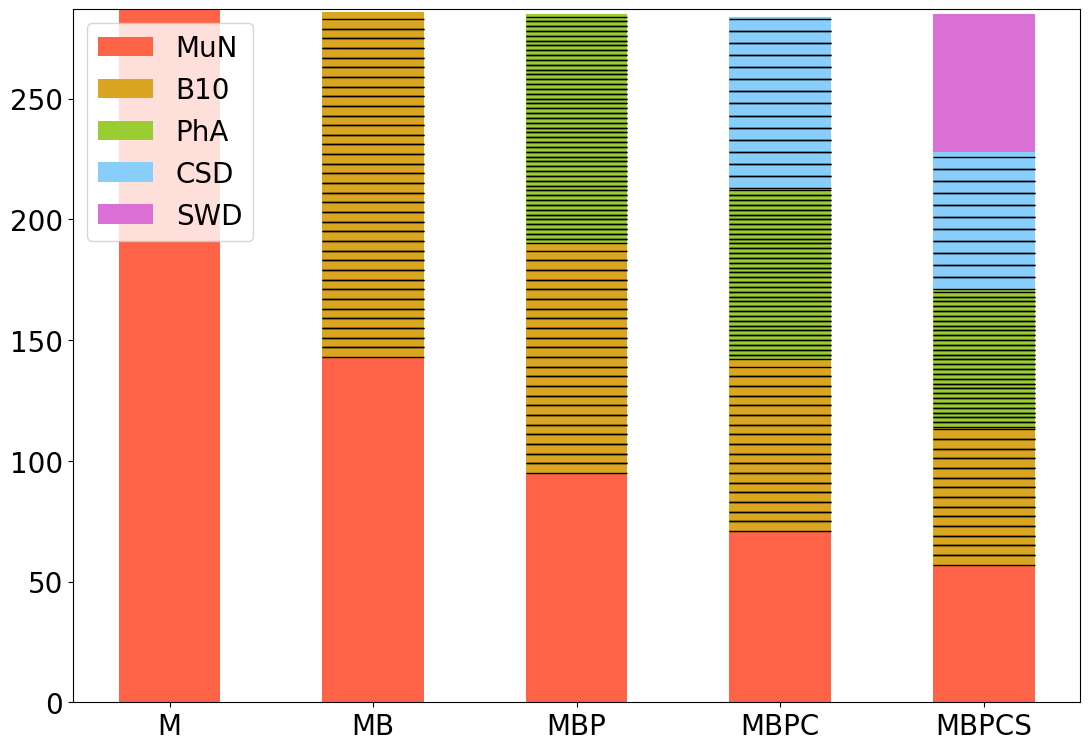

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import matplotlib

models = ('M', 'MB', 'MBP', 'MBPC', 'MBPCS')

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['tomato', 'goldenrod', 'yellowgreen', 'lightskyblue', 'orchid'])  # Blue, Orange, Green
matplotlib.rcParams.update({'font.size': 20})

dataset_counts = {
    'MuN': np.array([287, 287 // 2, 287 // 3, 287 // 4, 287 // 5]),
    'B10': np.array([0, 4, 4, 4, 4]),
    'PhA': np.array([0, 0, 0, 0, 0]),
    'CSD': np.array([0, 0, 0, 0, 0]),
    'SWD': np.array([0, 0, 0, 0, 0]),
}

dataset_actual_counts = {
    'MuN': np.array([287, 287 // 2, 287 // 3, 287 // 4, 287 // 5]),
    'B10': np.array([0, 287 // 2, 287 // 3, 287 // 4, 287 // 5]),
    'PhA': np.array([0, 0, 287 // 3, 287 // 4, 287 // 5]),
    'CSD': np.array([0, 0, 0, 287 // 4, 287 // 5]),
    'SWD': np.array([0, 0, 0, 0, 287 // 5]),
}

dataset_colors = {
    'MuN': 'lightcoral'
}

width = 0.5

fig, ax = plt.subplots(figsize=(13, 9))
bottom: np.ndarray = np.zeros(5)

# num_segments = {
#     'MuN': 0,
#     'B10': 0
# }

dataset_segments = {
    'MuN': np.array([1, 1, 1, 1, 1]),
    'B10': np.array([1, (287/2)//4, (287/3)//4, (287/4)//4, (287/5)//4]),
    'PhA': np.array([1, 1, (287/3)//2, (287/4)//2, (287/5)//2]),
    'CSD': np.array([1, 1, 1, (287/4)//5, (287/5)//5]),
    'SWD': np.array([1, 1, 1, 1, (287/5)//65])
}


for dataset, weight_count in dataset_actual_counts.items():
    if dataset == 'B10' or  dataset == 'PhA' or dataset == 'CSD':
        bottom_for_lines = copy.deepcopy(bottom)
        segment_heights_for_lines: np.ndarray = np.round(weight_count / dataset_segments[dataset]).astype(int)

        num_segments = dataset_segments[dataset]
        p = ax.bar(models, weight_count, width, label=dataset, bottom=bottom)
        bottom += weight_count

        model_counter = 0
        for j in dataset_segments[dataset]:
            if j == 1:
                model_counter += 1
                continue

            # For each line to draw
            for i in range(int(j)):
                ax.hlines(bottom_for_lines[model_counter], model_counter - (width/2), model_counter + (width/2), linewidth=1, color='black')
                bottom_for_lines[model_counter] += segment_heights_for_lines[model_counter]
                ax.hlines(bottom_for_lines[model_counter], model_counter - (width/2), model_counter + (width/2), linewidth=1, color='black')

            model_counter += 1
    else:
        p = ax.bar(models, weight_count, width, label=dataset, bottom=bottom)
        bottom += weight_count

# ax.bar('M', 100, width, bottom=bottom, label='MuN')
plt.legend()
plt.show()